In [6]:
#github repository sync in google colab
import os
try:
  # Colab only
  !git clone https://github.com/noersy/computer_vision.git
  os.chdir('/content')      
except Exception:
  pass

Cloning into 'computer_vision'...
remote: Enumerating objects: 538, done.
remote: Counting objects: 100% (9/9), done.
remote: Compressing objects: 100% (9/9), done.
remote: Total 538 (delta 2), reused 2 (delta 0), pack-reused 529
Receiving objects: 100% (538/538), 268.85 MiB | 29.24 MiB/s, done.
Resolving deltas: 100% (248/248), done.
Checking out files: 100% (138/138), done.


In [39]:
import cv2
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
import numpy as np

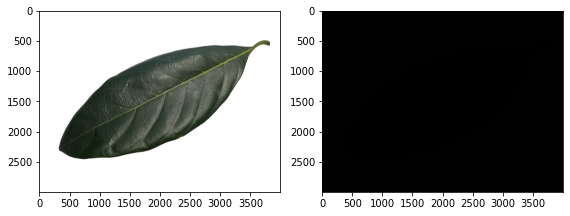

In [20]:
image = plt.imread("/content/computer_vision/images/daun_nangka/051.png")
cv2.imwrite('/content/computer_vision/images/daun_nangka/051_2.png', image)
image2 = plt.imread("/content/computer_vision/images/daun_nangka/051_2.png")

fig, axes = plt.subplots(1, 2, figsize = (8, 8))
fig.tight_layout()
axes = axes.ravel()

axes[0].imshow(image)
axes[1].imshow(image2)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


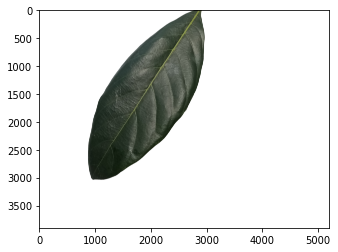

In [ ]:
center = image.shape[1]/2, image.shape[0]/2
angle = 30
scale = 1.0

M = cv2.getRotationMatrix2D(center, angle, scale)

rotated_image = cv2.warpAffine(image, M, (int(image.shape[1]*1.3), int(image.shape[0]*1.3)), borderValue=(255, 255, 255))
plt.figure()
plt.imshow(rotated_image)

(900, 1200, 3)


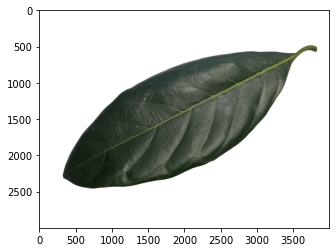

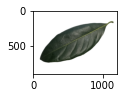

In [ ]:

width, height = int(image.shape[1]*0.3), int(image.shape[0]*0.3)
resized_image = cv2.resize(image, 
                          (width, height), 
                          interpolation = cv2.INTER_AREA,)
plt.imshow(image)
plt.figure(figsize = (1.5, 1.5))
plt.imshow(resized_image)
print(resized_image.shape)


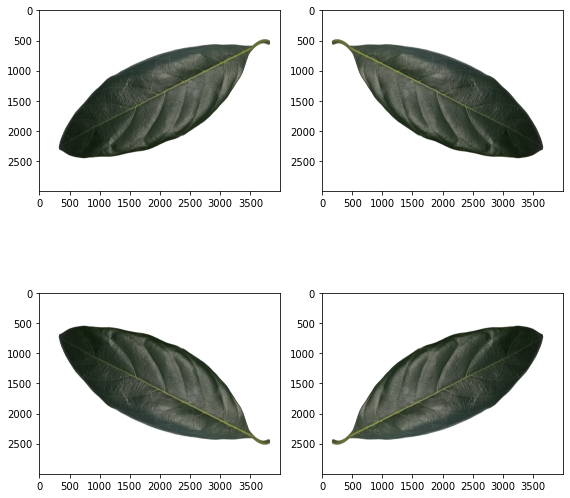

In [ ]:

fig, axes = plt.subplots(2, 2, figsize = (8, 8))

fig.tight_layout()

axes = axes.ravel()
axes[0].imshow(image)
axes[1].imshow(image[:, ::-1, :])
axes[2].imshow(image[::-1, :, :])
axes[3].imshow(image[::-1, ::-1, :])

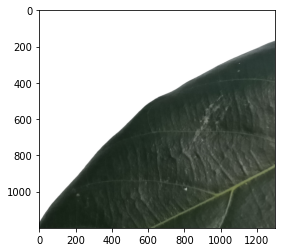

In [ ]:
patch = (1300, 1200)
center = (1190, 1220)
cropped_image = cv2.getRectSubPix(image, patch, center)
plt.imshow(cropped_image)
plt.show()

-1

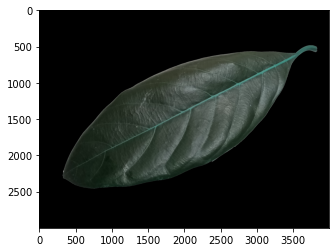

In [54]:
import cv2
import numpy as np

def process(img):
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img_canny = cv2.Canny(img_gray, 0, 50)
    img_dilate = cv2.dilate(img_canny, None, iterations=1)
    img_erode = cv2.erode(img_dilate, None, iterations=1)
    return img_erode

def get_masked(img):
    h, w, _ = img.shape
    center = h // 2, w // 2
    contours, _ = cv2.findContours(process(img), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
    for cnt in contours:
        if cv2.contourArea(cnt) > 100:
            if cv2.pointPolygonTest(cnt, center, False) > 0:
                mask = np.zeros((h, w), 'uint8')
                cv2.drawContours(mask, [cnt], -1, 255, -1) 
                return cv2.bitwise_and(img, img, mask=mask)

img = cv2.imread("/content/computer_vision/images/daun_nangka/051.png")
img_masked = get_masked(img);
plt.imshow(img_masked)
cv2.waitKey(0)

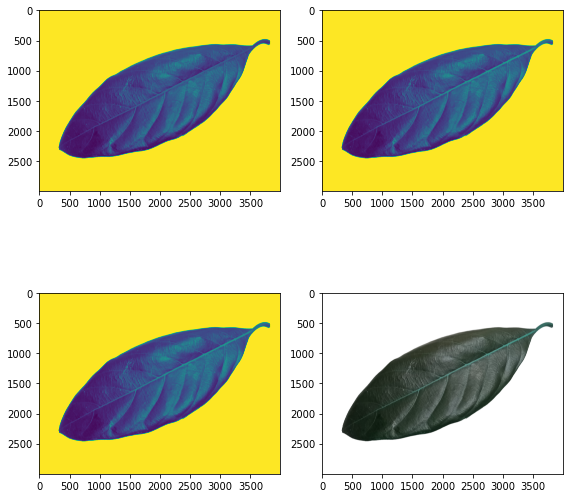

In [51]:
image = cv2.imread("/content/computer_vision/images/daun_nangka/051.png")
b, g, r = cv2.split(image)
newImage = cv2.merge((b,g,r))

fig, axes = plt.subplots(2, 2, figsize = (8, 8))

fig.tight_layout()

axes = axes.ravel()
axes[0].imshow(b)
axes[1].imshow(g)
axes[2].imshow(r)
axes[3].imshow(newImage)